<a href="https://colab.research.google.com/github/HeadOutii/AIRepair/blob/main/CNN1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow kaggle matplotlib

In [ ]:
import kagglehub
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
def load_and_resize_first_10_images_from_folder(folder, target_size=(256, 256)):
    images = []
    count = 0
    for filename in os.listdir(folder):
        if count >= 32:
            break
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
            count += 1
    return np.array(images)

In [ ]:
path = kagglehub.dataset_download("bharatadhikari/humanface8000")
print("Path to dataset files:", path)
image_folder = os.path.join(path, 'landscape Images/gray')
mask_folder = os.path.join(path, 'landscape Images/color')

Path to dataset files: /root/.cache/kagglehub/datasets/bharatadhikari/humanface8000/versions/1


In [ ]:
images = load_and_resize_first_10_images_from_folder(image_folder)
masks = load_and_resize_first_10_images_from_folder(mask_folder)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = y_train.astype('float32') / 255.0
y_test = y_test.astype('float32') / 255.0

In [ ]:
image_files = []

In [ ]:
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))

In [ ]:
def load_images(image_files, image_size=(64, 64)):
    images = []
    for img_path in image_files:
        try:
            img = Image.open(img_path)
            img = img.resize(image_size)
            images.append(np.array(img) / 255.0)
        except Exception as e:
            print(f"Ошибка при загрузке изображения {img_path}: {e}")
    return np.array(images)

In [ ]:
def plot_images(images, title="Images"):
    num_images = len(images)
    fig, axs = plt.subplots(4, 4, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axs.flat):
        if i < num_images:
            ax.imshow(images[i])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

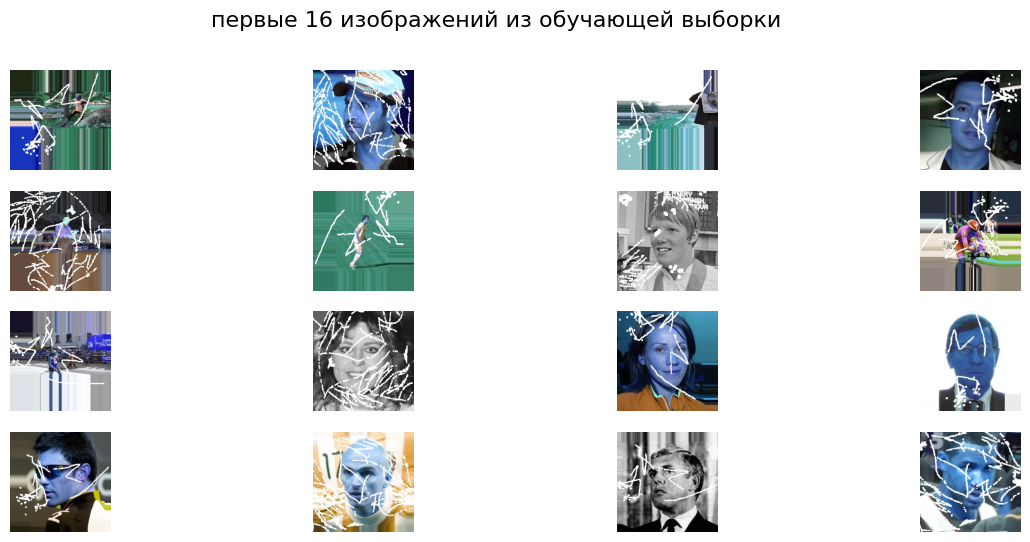

In [ ]:
plot_images(X_train, title="первые 16 изображений из обучающей выборки")